<a href="https://www.kaggle.com/code/mohammedmohsen0404/notebookefb911406a?scriptVersionId=191111951" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Mushroom Classification</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy. **Objective** The main objective is to predict whether a mushroom is edible or poisonous based on various features. This predictive model can help mushroom foragers identify which mushrooms are safe to eat and which ones are not.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download uciml/mushroom-classification -f  mushrooms.csv














cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory

Dataset URL: https://www.kaggle.com/datasets/uciml/mushroom-classification

License(s): CC0-1.0


100% 365k/365k [00:00<00:00, 2.52MB/s]

100% 365k/365k [00:00<00:00, 2.52MB/s]


In [43]:
df = pd.read_csv("mushrooms.csv").copy()

# **Take a look at the data**
---

In [34]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8124 entries, 0 to 8123

Data columns (total 23 columns):

 #   Column                    Non-Null Count  Dtype 

---  ------                    --------------  ----- 

 0   class                     8124 non-null   object

 1   cap-shape                 8124 non-null   object

 2   cap-surface               8124 non-null   object

 3   cap-color                 8124 non-null   object

 4   bruises                   8124 non-null   object

 5   odor                      8124 non-null   object

 6   gill-attachment           8124 non-null   object

 7   gill-spacing              8124 non-null   object

 8   gill-size                 8124 non-null   object

 9   gill-color                8124 non-null   object

 10  stalk-shape               8124 non-null   object

 11  stalk-root                8124 non-null   object

 12  stalk-surface-above-ring  8124 non-null   object

 13  stalk-surface-below-ring  8124 non-null   object

 14  stalk

In [29]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [35]:
df['class'].value_counts()

,count
class,
e,4208
p,3916


# **Exploratory df Analysis**
---

**Univariate Analysis**

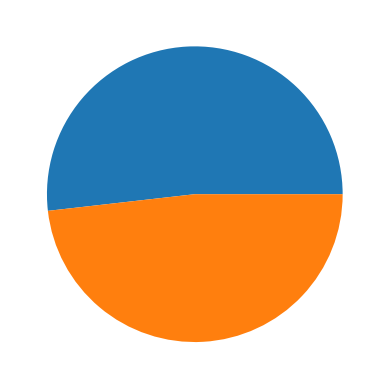

In [117]:
plt.pie(df['class'].value_counts() )
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [36]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [37]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
class,0,0.0
stalk-surface-above-ring,0,0.0
population,0,0.0
spore-print-color,0,0.0
ring-type,0,0.0
ring-number,0,0.0
veil-color,0,0.0
veil-type,0,0.0
stalk-color-below-ring,0,0.0
stalk-color-above-ring,0,0.0


In [38]:
total = df.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Encoding Categorical Variables**

In [45]:
df['class'] = df['class'].apply(lambda x: 0 if x == 'p' else 1)

In [39]:
!pip install category_encoders

In [46]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder()
df = encoder.fit_transform(df)

In [47]:
df.head()

,class,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,cap-color_1,cap-color_2,...,spore-print-color_0,spore-print-color_1,spore-print-color_2,spore-print-color_3,population_0,population_1,population_2,habitat_0,habitat_1,habitat_2
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2,1,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,1
3,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0


**Data splitting**

In [48]:
from sklearn.model_selection import train_test_split
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=44,stratify=y)

# **Modeling**
-----

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report , f1_score , confusion_matrix

In [108]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('xgboost', xgb.XGBClassifier(tree_method="hist")),
]

Logistic Regression: F1 Score = 1.00

Logistic Regression Classification Report:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00      1175

           1       1.00      1.00      1.00      1263



    accuracy                           1.00      2438

   macro avg       1.00      1.00      1.00      2438

weighted avg       1.00      1.00      1.00      2438




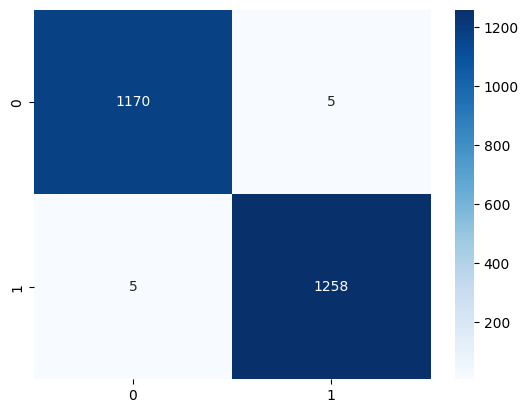

---------------------------------------------------

Random Forest: F1 Score = 1.00

Random Forest Classification Report:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00      1175

           1       1.00      1.00      1.00      1263



    accuracy                           1.00      2438

   macro avg       1.00      1.00      1.00      2438

weighted avg       1.00      1.00      1.00      2438




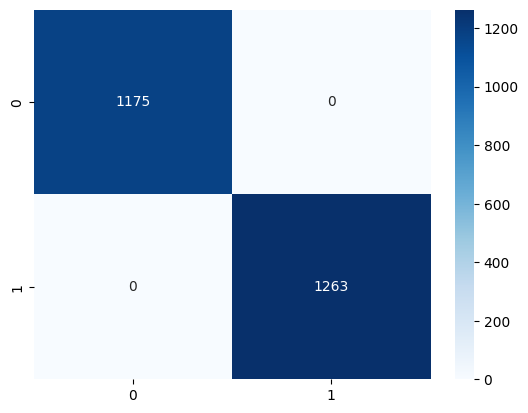

---------------------------------------------------

Gradient Boosting: F1 Score = 1.00

Gradient Boosting Classification Report:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00      1175

           1       1.00      1.00      1.00      1263



    accuracy                           1.00      2438

   macro avg       1.00      1.00      1.00      2438

weighted avg       1.00      1.00      1.00      2438




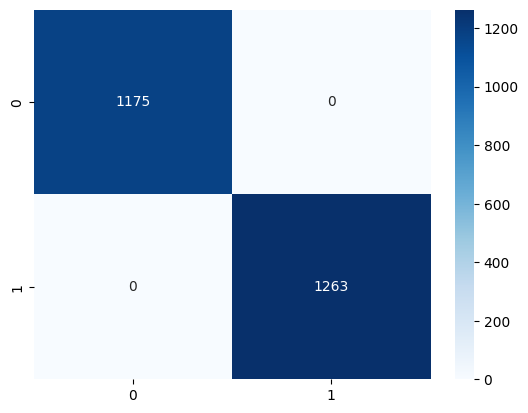

---------------------------------------------------

K-Nearest Neighbors: F1 Score = 1.00

K-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00      1175

           1       1.00      1.00      1.00      1263



    accuracy                           1.00      2438

   macro avg       1.00      1.00      1.00      2438

weighted avg       1.00      1.00      1.00      2438




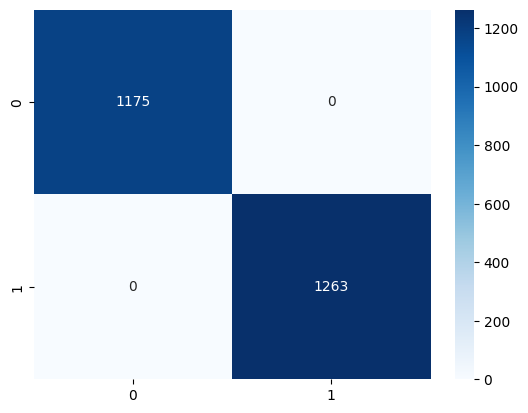

---------------------------------------------------

Support Vector Machine: F1 Score = 1.00

Support Vector Machine Classification Report:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00      1175

           1       1.00      1.00      1.00      1263



    accuracy                           1.00      2438

   macro avg       1.00      1.00      1.00      2438

weighted avg       1.00      1.00      1.00      2438




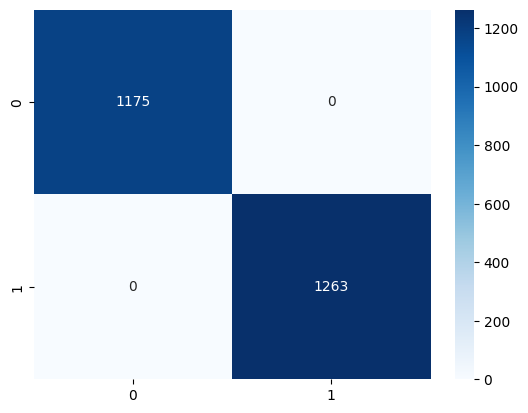

---------------------------------------------------

xgboost: F1 Score = 1.00

xgboost Classification Report:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00      1175

           1       1.00      1.00      1.00      1263



    accuracy                           1.00      2438

   macro avg       1.00      1.00      1.00      2438

weighted avg       1.00      1.00      1.00      2438




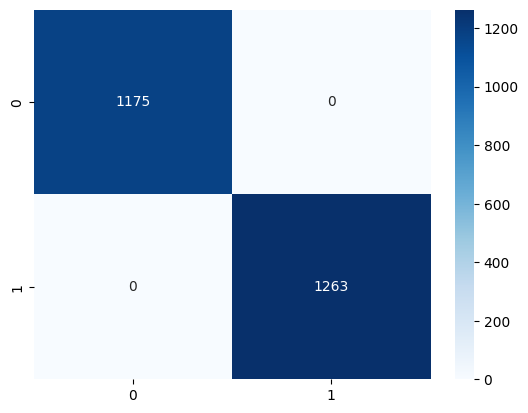

---------------------------------------------------


In [110]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Using weighted average for multi-class classification
    print(f'{clf_name}: F1 Score = {f1:.2f}')
    print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
    plt.show()
    print('-----------------------------------------------------------------')